In [13]:
#Code to simulate birthday paradox problem and visualize insights

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def birthday_problem_simulation(num_people, num_simulations):
    # Initialize a list to store results of each simulation
    shared_birthdays_count = []

    for _ in range(num_simulations):
        # Generate random birthdays for num_people people
        birthdays = [random.randint(1, 365) for _ in range(num_people)]

        # Check for shared birthdays
        if len(set(birthdays)) < num_people:
            shared_birthdays_count.append(1)
        else:
            shared_birthdays_count.append(0)
    
    # Calculate probability of shared birthdays
    probability = sum(shared_birthdays_count) / num_simulations
    
    return probability


In [16]:
def exact_birthday_probability(num_people):
    # Calculate the exact probability mathematically accounting for all combinations
    probability = 1.0
    for i in range(num_people):
        probability *= (365 - i) / 365.0
    return 1 - probability

In [17]:
def plot_birthday_problem(num_people_list, simulation_probabilities, exact_probabilities, output_file="prob_shared_birthday_vs_group_size.pdf"):
    """
    Plots the probability of at least one shared birthday as a function of the number of people in a group.
    
    Parameters:
    - num_people_list (list of int): List of number of people in a group.
    - simulation_probabilities (list of float): Corresponding probabilities from simulation.
    - exact_probabilities (list of float): Corresponding exact probabilities from mathematical calculation.
    - output_file (str): Filename for saving the plot. Default is 'prob_shared_birthday_vs_group_size.pdf'.
    """
    fig = plt.figure(figsize=(10, 6))
    plt.plot(num_people_list, simulation_probabilities, marker='o', linestyle='-', color='b', label='Simulation Results')
    plt.plot(num_people_list, exact_probabilities, marker='x', linestyle='--', color='g', label='Analytical Results')
    plt.axhline(y=0.5, color='r', linestyle='--', label='50% Probability')
    plt.title('Birthday Problem: Probability of at least one shared Birthday')
    plt.xlabel('Number of People')
    plt.ylabel('Probability')
    plt.xticks(range(0, 101, 5))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig(output_file, dpi=300, bbox_inches='tight')

In [18]:
def main():
    # Parameters
    num_people_list = list(range(1, 101))  # Number of people from 1 to 100
    num_simulations = 10000  # Number of simulations per number of people
    
    # Calculate probabilities for each number of people
    simulation_probabilities = [birthday_problem_simulation(num_people, num_simulations) for num_people in num_people_list]

    # Calculate exact probabilities for each number of people
    exact_probabilities = [exact_birthday_probability(num_people) for num_people in num_people_list]

    # Plot both simulation and exact probabilities
    plot_birthday_problem(num_people_list, simulation_probabilities, exact_probabilities, output_file="prob_shared_birthday_vs_group_size.pdf")


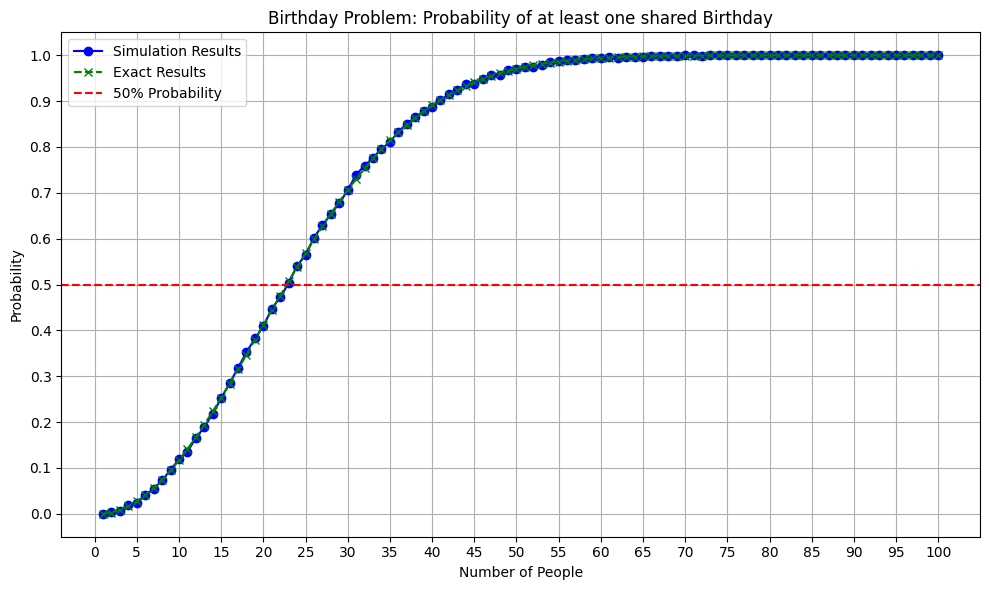

In [19]:
#trick to check if this code is being run directly and avoid it executing when imported as a module in other scripts 
if __name__ == "__main__":
    main()

In [20]:
#invert the problem:
#Given n number of people, plot probability of having x number of shared birthdays